# Perculation Simulation

## The drawing table

First of all we have to create a grid of size L. With a $p$ probability that each of the squares inside the raster is occupied.
We will do this by creating a matrix where all the elements are initially zero and have a chance $p$ to be 1.

In [1]:
import numpy as np
import random
import time

In [2]:
#this function will give True or False to later determine what elements will be coloured in the grid.
def decision(probability):
    return random.random() < probability

In [3]:
def one_or_zero(el, probability):
    if decision(probability):
        return 1
    else:
        return 0

In [4]:
def create_world(size,probability):
    vector= np.zeros(size**2)  #create vector to make the iteration easier
    vector[:] = [one_or_zero(el,probability) for el in vector]   #make certain elements one and zero depending on the prob
    return vector.reshape(size,size)    #reshape the vector to a matrix

In [5]:
M=create_world(5,0.3)
M

array([[1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [6]:
from matplotlib import pyplot as plt
from matplotlib import colors

def draw_array(M):
    cmap = colors.ListedColormap(['White','Red'])
    plt.figure(figsize=(5,5))
    plt.pcolor(M[::-1],cmap=cmap,edgecolors='k', linewidths=0.1)
    plt.show()

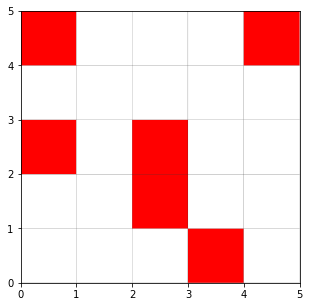

In [7]:
draw_array(M)

## How to count?

We will now implement an algoritm to count the amount of clusters in the grid. The method I have chosen is the Hoshen and Kopelman algortim.

The function below returns the number of clusters, the list in where the clusters are counted with their respective number of sites (negative means that this one is 'slorped' by another cluster), the matrix in which the different numbers can be shown,  the number of unoccupied sites and the number of the sites in the largest cluster.

In [10]:
def occupied(el):
    return el==1

In [17]:
def Hoshen_and_Kopelman(matrix):
    U=np.copy(matrix)
    l=2
    list=np.zeros(len(matrix)**2)
    if occupied(U[0,0]):
        U[0,0]=l
        list[l]+=1
        l+=1
    else:
        list[0]+=1
    for j in range(len(U[0,:])-1): #top row
        j+=1
        if occupied(U[0,j]):
            if U[0,j-1]!=0:         #look left
                U[0,j]=U[0,j-1]
                list[int(U[0,j-1])]+=1.
            else:
                U[0,j]=l
                list[l]+=1
                l+=1
        else:
            list[0]+=1
    for i in range(len(U[0,:])-1):
        i+=1
        if occupied(U[i,0]):
            if U[i-1,0]!=0:           #look up
                U[i,0]=U[i-1,0]
                list[int(U[i-1,0])]+=1
            else:
                U[i,0]=l
                list[l]+=1
                l+=1
        else:
            list[0]+=1
            
        for j in range(len(U[:,0])-1):
            j+=1
            if occupied(U[i,j]):
                
                if U[(i-1),j]!=0:            #look up
                    U[i,j]=U[(i-1),j]
                    list[int(U[i-1,j])]+=1
                    
                    if U[i,j-1]!=0:                #look left
                        if U[i-1,j]!=U[i,j-1]:             #look left and up
                            list[int(U[i-1,j])]+=list[int(U[i,j-1])]
                            list[int(U[i,j-1])]=-int(U[i,j])
                            U[U == U[i,j-1]]=U[i-1,j]      #chance value of one cluster to the other

                    
                elif U[i,j-1]!=0:         #look left
                    U[i,j]=U[i,j-1]
                    list[int(U[i,j-1])]+=1.
                    
                else:
                    U[i,j]=l
                    list[l]+=1
                    l+=1
            else:
                list[0]+=1
    number_of_clusters= sum([i>0 for i in list])-1
    number_of_unoccupied_sites=list[0]
    largest_cluster=max(list[1:])
    return [number_of_clusters, list, U, number_of_unoccupied_sites, largest_cluster]

## Example

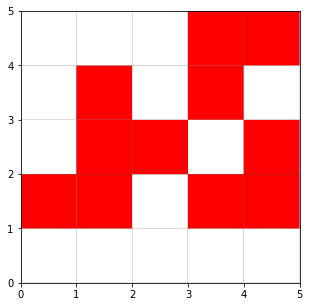

In [22]:
M=create_world(5,0.4)
small_world=Hoshen_and_Kopelman(M)
draw_array(M)

Number of clusters:

In [23]:
small_world[0]

3

## Time

In [19]:
M=create_world(500,0.7)
# draw_array(M)
toc= time.time()
HK=Hoshen_and_Kopelman(M)[0]
tic = time.time()
t=tic-toc
t

17.521581888198853